## **TCS-Industry Assignment**



## **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model



## **load and Explore the Dataset**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
classes[1]

'automobile'

## **Data visualization**

In [ ]:
def plot_sample(X,y ,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])



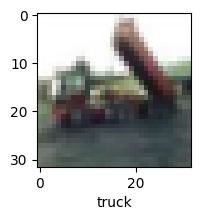

In [ ]:
plot_sample(X_train,y_train, 2)

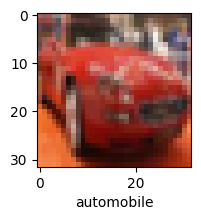

In [ ]:
plot_sample(X_train, y_train ,5)

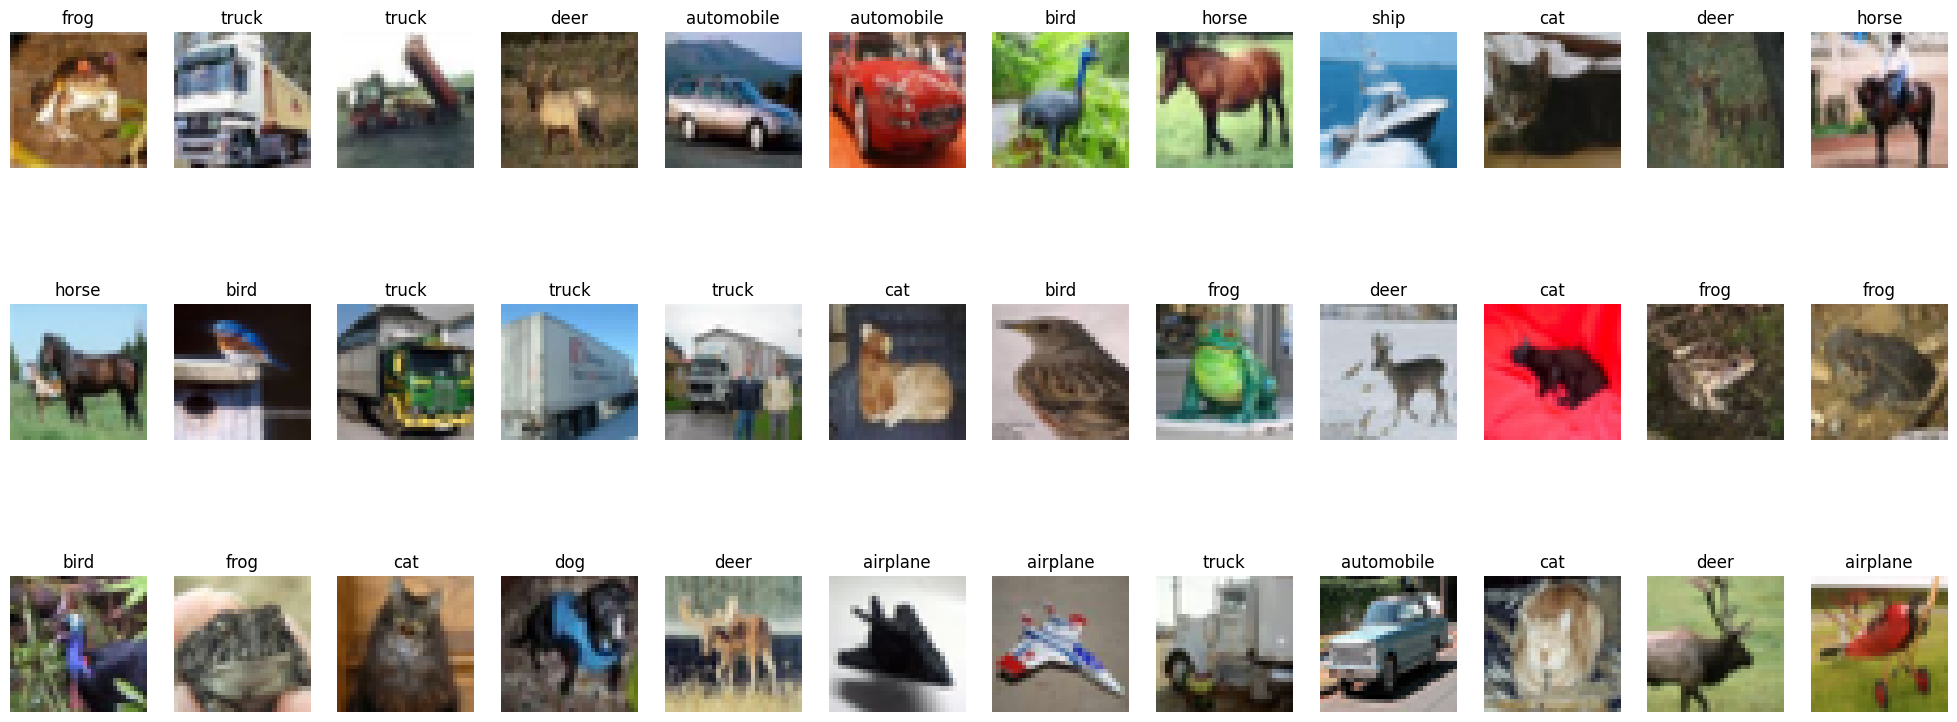

In [ ]:
def plot_images_with_labels(X, y, classes):
    fig, axes = plt.subplots(3, 12, figsize=(25, 10))
    axes = axes.ravel()

    for i in range(36):
        axes[i].imshow(X[i])
        axes[i].set_title(classes[y[i]])
        axes[i].axis('off')
plot_images_with_labels(X_train, y_train, classes)

# **Preprocess the Data**

###  **Preprocess the data by normalizing pixel values and one-hot encoding labels.**

In [ ]:
X_train=X_train/ 255  # Normalisze pixel values to the range [0,1]

X_test=X_test/ 255


In [ ]:
y_train  = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## **Build CNN Model**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),                      #First Convolutional layer

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),                       #Second Convolutional layer

    layers.Flatten(),
    layers.Dense(128, activation='relu'),            #hidden layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## **Compile the Model**

In [ ]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **Train the Model**

In [ ]:
history=cnn.fit(X_train, y_train, epochs=10,  validation_split=0.2)
history

Epoch 1/10
1250/1250 [==============================] - 17s 6ms/step - loss: 1.4764 - accuracy: 0.4676 - val_loss: 1.2036 - val_accuracy: 0.5722
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1194 - accuracy: 0.6061 - val_loss: 1.0637 - val_accuracy: 0.6315
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9656 - accuracy: 0.6641 - val_loss: 0.9804 - val_accuracy: 0.6596
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8646 - accuracy: 0.6976 - val_loss: 0.9316 - val_accuracy: 0.6755
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7722 - accuracy: 0.7315 - val_loss: 0.9152 - val_accuracy: 0.6860
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6888 - accuracy: 0.7587 - val_loss: 0.9485 - val_accuracy: 0.6809
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6155 - accuracy: 0.7848 - val_loss: 0.9521 - val_accuracy

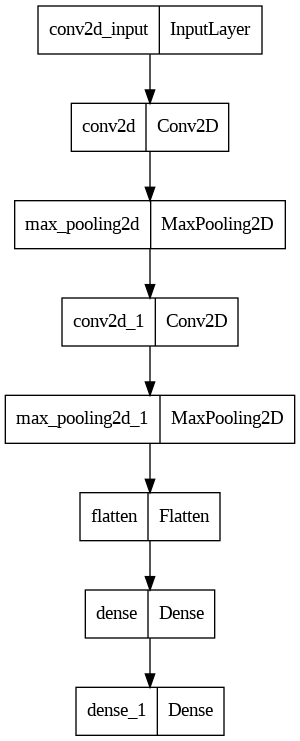

In [ ]:
plot_model(cnn)


# **Evaluate the Model**

In [ ]:
Test_loss, Test_accuracy =cnn.evaluate(X_test,y_test)
print(f'Test accuracy: {Test_accuracy}')


313/313 [==============================] - 1s 3ms/step - loss: 1.0745 - accuracy: 0.6858
Test accuracy: 0.6858000159263611


In [ ]:
Train_loss, Train_accuracy =cnn.evaluate(X_train,y_train)
print(f'Test accuracy: {Train_accuracy}')

1563/1563 [==============================] - 5s 3ms/step - loss: 0.4551 - accuracy: 0.8585
Test accuracy: 0.8585399985313416


Without using the batch size  test accuraray is 68% and training accuraray is 85%

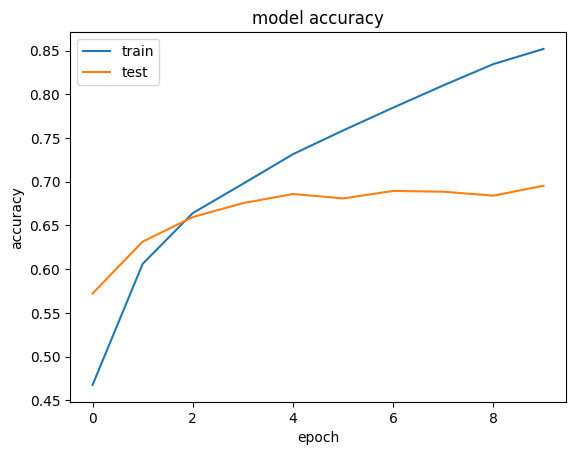

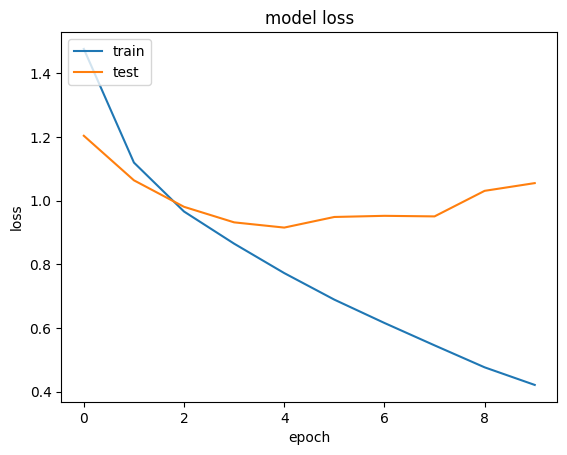

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
batch_sizes = [32, 64]
num_epochs = [10,20]


# Iterate through batch sizes and epochs
for batch_size in batch_sizes:
    for epochs in num_epochs:
        print(f"Training with batch size {batch_size} and {epochs} epochs...")

        print("------------------------------------------------------------------------------------------")

        # Fit the model with the current batch size and number of epochs
        history1= cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

        print("------------------------------------------------------------------------------------------")


        # Evaluate and print the results
        test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
        print(f"Test accuracy with batch size {batch_size} and {epochs} epochs: {test_accuracy * 100:.2f}%")

        print("------------------------------------------------------------------------------------------")



Training with batch size 32 and 10 epochs...
------------------------------------------------------------------------------------------
Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3592 - accuracy: 0.8732 - val_loss: 1.1046 - val_accuracy: 0.6808
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3066 - accuracy: 0.8938 - val_loss: 1.2621 - val_accuracy: 0.6768
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2593 - accuracy: 0.9104 - val_loss: 1.2863 - val_accuracy: 0.6827
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2199 - accuracy: 0.9251 - val_loss: 1.4481 - val_accuracy: 0.6680
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1851 - accuracy: 0.9349 - val_loss: 1.5062 - val_accuracy: 0.6845
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1615 - accuracy: 0.9436 - val_loss: 1.7287 - val_accuracy: 0.6695


## **Batch Size: 32, Epochs: 10**

**Training Accuracy**: 96.29%

**Test Accuracy**: 66.97%

---


## **Batch Size: 32, Epochs: 20**

**Training Accuracy**: 98.28%

**Test Accuracy:** 65.95%

---


## **Batch Size: 64, Epochs: 10**
**Training Accuracy**: 100.00%

**Test Accuracy**: 68.23%


---


**Batch Size: 64, Epochs: 20**

**Training Accuracy**: 100.00%

**Test Accuracy**: 68.70%

## Plotting the Actual vs Predicted results

313/313 [==============================] - 1s 2ms/step


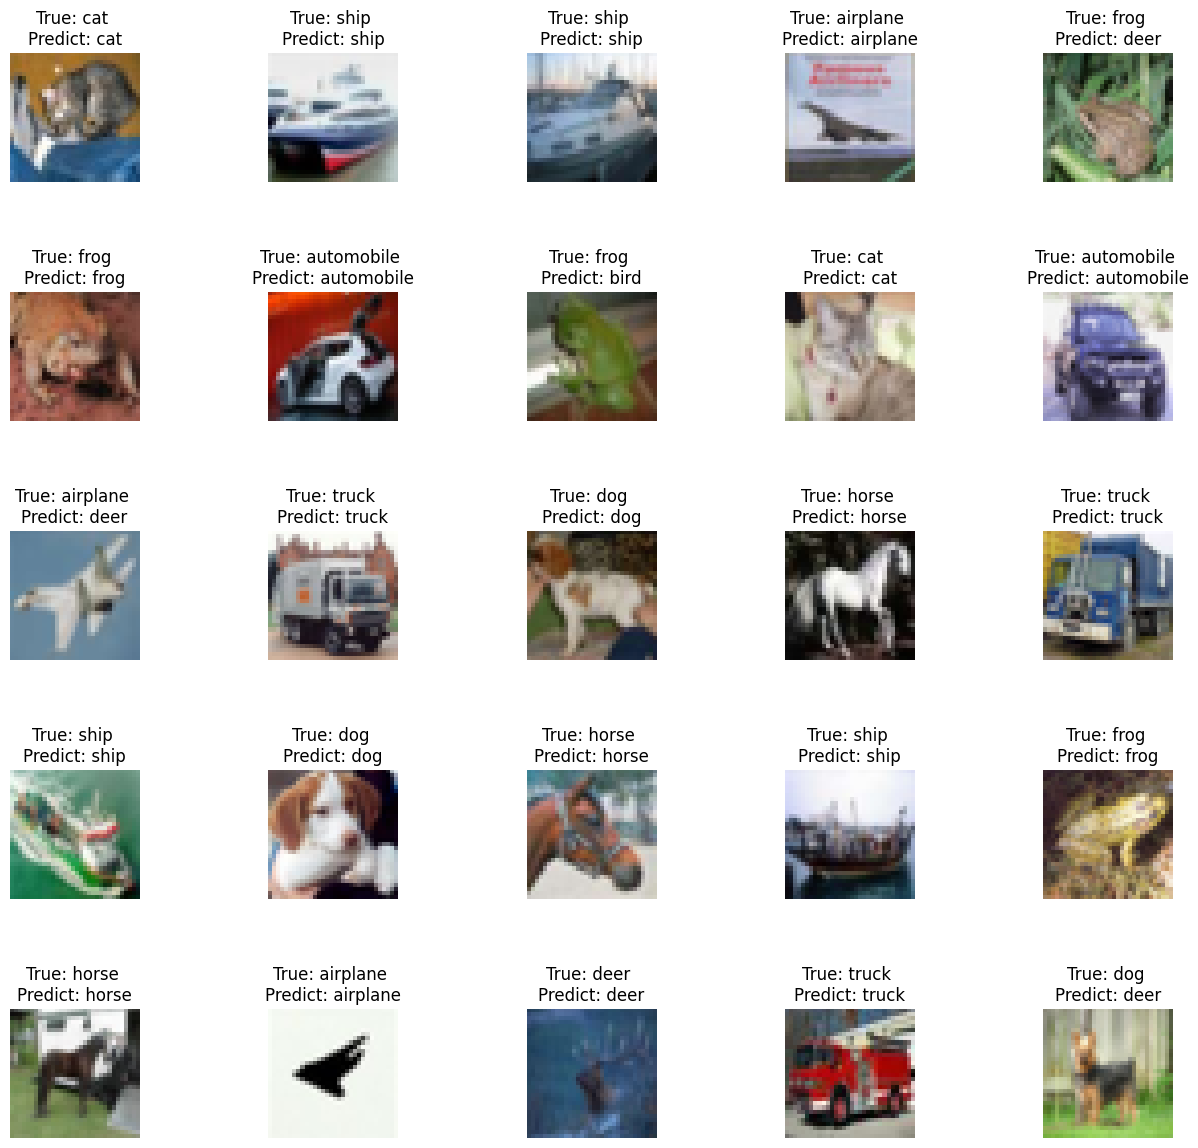

In [ ]:
y_pred= cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(y_test[i])], classes[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [ ]:
from keras.datasets import cifar10
import cv2

(X_train_gray, y_train_gray), (X_test_gray, y_test_gray) = cifar10.load_data()


In [ ]:
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train_gray])
X_test_gray= np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test_gray])

In [ ]:
y_train_gray=y_train_gray.reshape(-1,)
y_train_gray[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

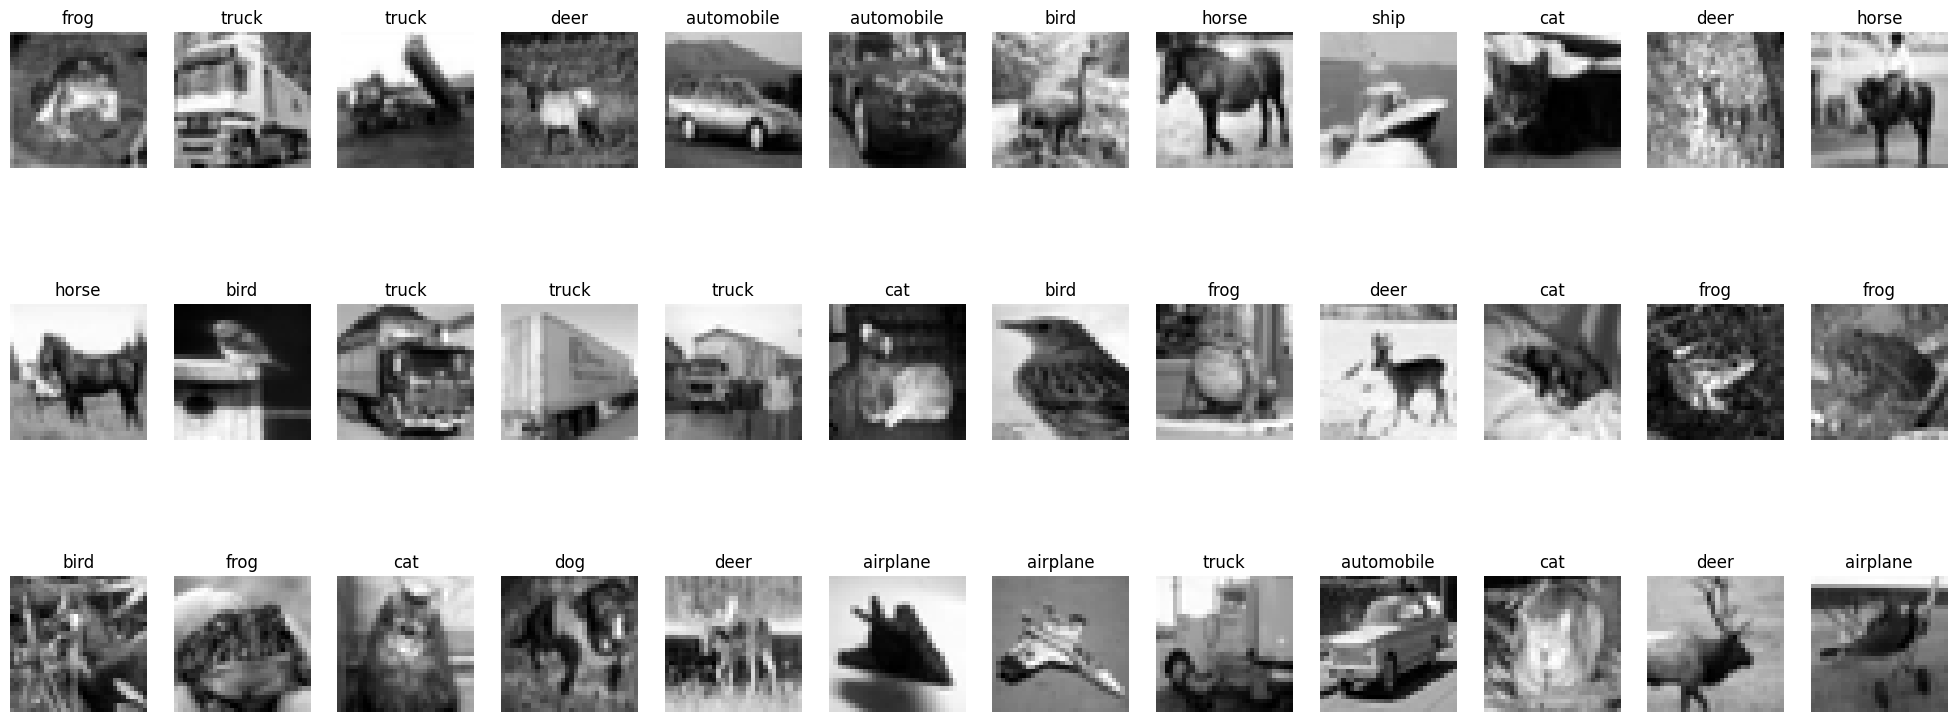

In [ ]:
def plot_images_with_labels(X, y, classes):
    fig, axes = plt.subplots(3, 12, figsize=(25, 10))
    axes = axes.ravel()


    for i in range(36):
        axes[i].imshow(X[i],cmap='gray')
        axes[i].set_title(classes[y[i]])
        axes[i].axis('off')
plot_images_with_labels(X_train_gray, y_train_gray, classes)

In [ ]:
from keras import models, layers
# Normalize pixel values to the range [0, 1]
X_train_gray = X_train_gray / 255
X_test_gray = X_test_gray / 255

# Reshape the data to match the CNN input shape
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# One-hot encode labels
y_train_gray = to_categorical(y_train_gray, 10)
y_test_gray = to_categorical(y_test_gray, 10)

# Define the CNN model
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),  # First Convolutional layer

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Second Convolutional layer

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set batch size and number of epochs
Batch_size = 64
Epoch = 10

# Train the model
history2= cnn1.fit(X_train_gray, y_train_gray, batch_size=Batch_size, epochs=Epoch, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 1.6547 - accuracy: 0.4123 - val_loss: 1.4058 - val_accuracy: 0.5034
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.3109 - accuracy: 0.5449 - val_loss: 1.2530 - val_accuracy: 0.5650
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 1.1708 - accuracy: 0.5964 - val_loss: 1.1529 - val_accuracy: 0.5994
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0836 - accuracy: 0.6265 - val_loss: 1.1603 - val_accuracy: 0.5954
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0134 - accuracy: 0.6483 - val_loss: 1.1030 - val_accuracy: 0.6154
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.9543 - accuracy: 0.6714 - val_loss: 1.0375 - val_accuracy: 0.6462
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8939 - accuracy: 0.6924 - val_loss: 1.0129 - val_accuracy: 0.6541
Epoch 

In [ ]:
Test_loss, Test_accuracy =cnn1.evaluate(X_test_gray,y_test_gray)
print(f'Test accuracy: {Test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.0118 - accuracy: 0.6618
Test accuracy: 0.6618000268936157


In [ ]:
Train_loss, Train_accuracy =cnn1.evaluate(X_train_gray,y_train_gray)
print(f'Train accuracy: {Train_accuracy}')

1563/1563 [==============================] - 5s 3ms/step - loss: 0.7230 - accuracy: 0.7543
Train accuracy: 0.7543399930000305


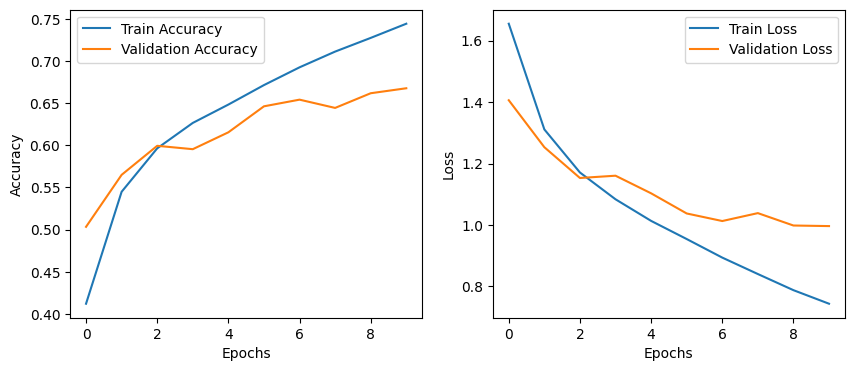

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the Actual vs Predicted results

313/313 [==============================] - 1s 2ms/step


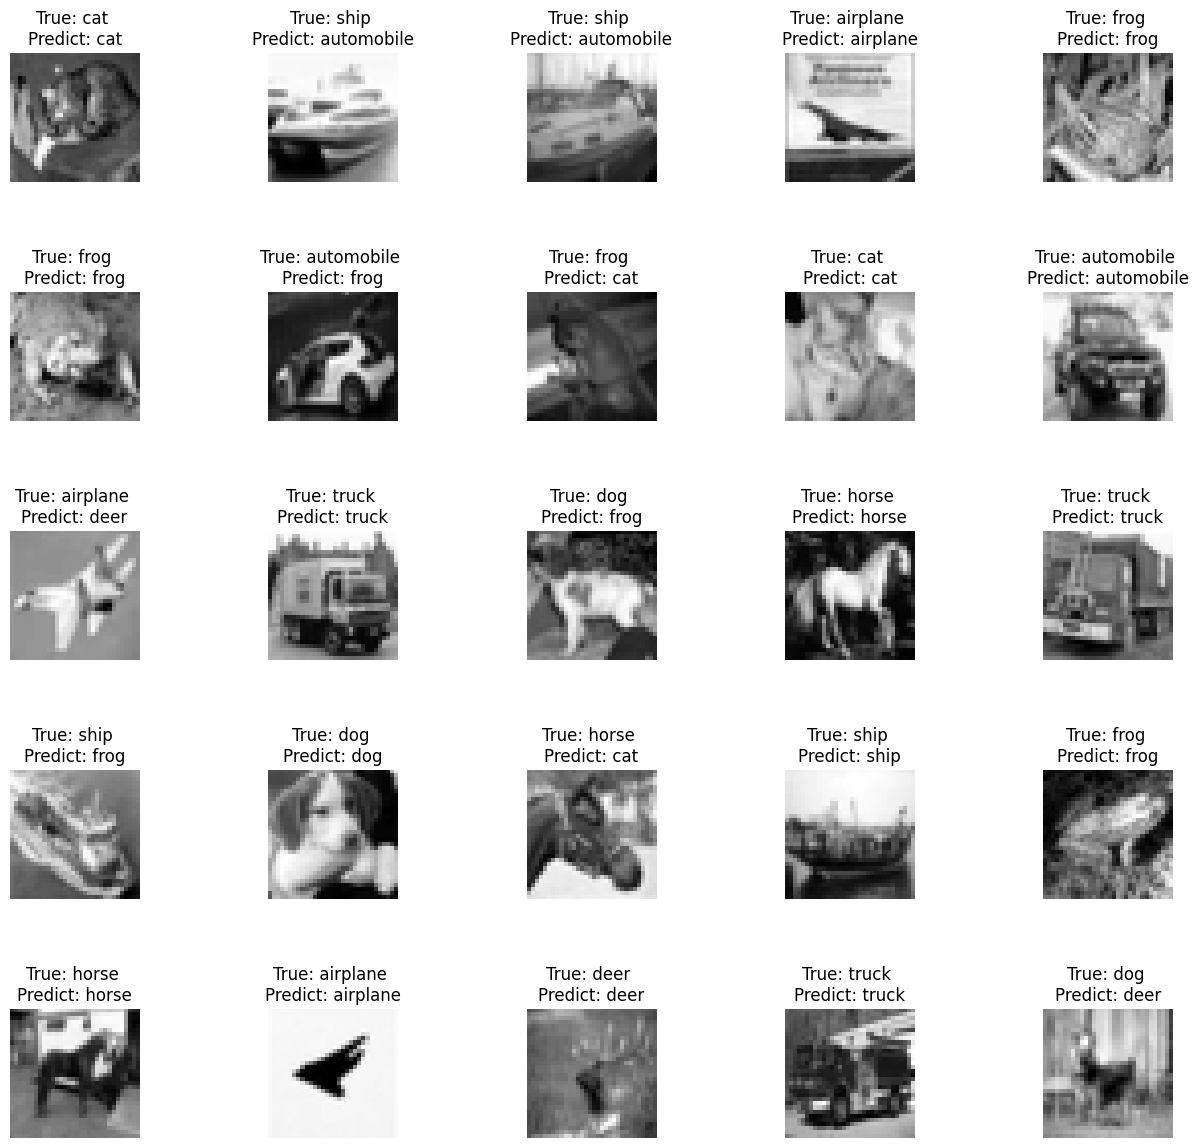

In [ ]:
y_pred_gray= cnn1.predict(X_test_gray)
y_pred_gray_classes = np.argmax(y_pred_gray, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test_gray[i],cmap='gray')
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(y_test_gray[i])], classes[y_pred_gray_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


## **AlexNet**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model= Sequential()
# First Convolutional layer
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Second Convolutional layer
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# First Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Third Convolutional layer
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Fourth Convolutional layer
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Second Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Fifth Convolutional layer
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Third Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
# First Hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Second Hidden layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

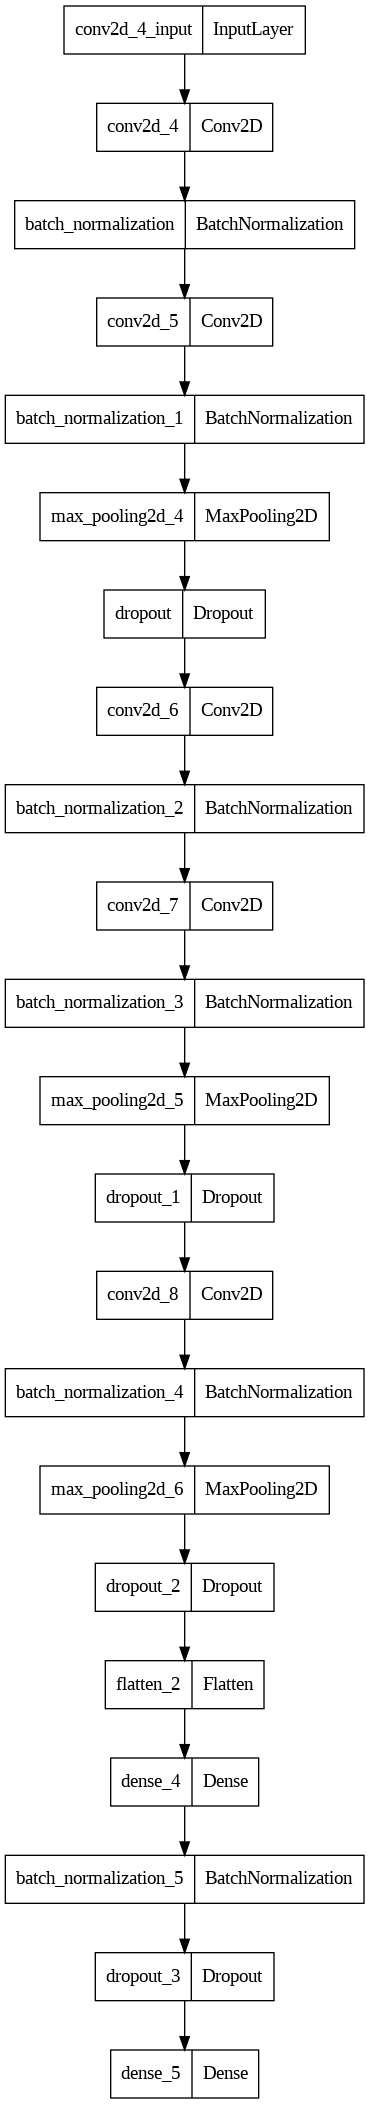

In [ ]:
plot_model(model)


In [ ]:
history3 = model.fit(X_train, y_train, batch_size=64, epochs =10, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/10
782/782 [==============================] - 28s 35ms/step - loss: 0.2629 - accuracy: 0.9105 - val_loss: 0.4498 - val_accuracy: 0.8551
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 0.2383 - accuracy: 0.9169 - val_loss: 0.5183 - val_accuracy: 0.8386
Epoch 3/10
782/782 [==============================] - 28s 36ms/step - loss: 0.2260 - accuracy: 0.9197 - val_loss: 0.6302 - val_accuracy: 0.8169
Epoch 4/10
782/782 [==============================] - 27s 35ms/step - loss: 0.2171 - accuracy: 0.9247 - val_loss: 0.4768 - val_accuracy: 0.8539
Epoch 5/10
782/782 [==============================] - 28s 36ms/step - loss: 0.2046 - accuracy: 0.9295 - val_loss: 0.5162 - val_accuracy: 0.8497
Epoch 6/10
782/782 [==============================] - 27s 35ms/step - loss: 0.1952 - accuracy: 0.9316 - val_loss: 0.5290 - val_accuracy: 0.8420
Epoch 7/10
782/782 [==============================] - 28s 36ms/step - loss: 0.1845 - accuracy: 0.9353 - val_loss: 0.5140 - val_accuracy:

In [ ]:
Alexnet_accuracy_test = model.evaluate(X_test, y_test)
print('Alexnet Test Accuracy: {}'.format(Alexnet_accuracy_test[1]))
Alexnet_accuracy_train = model.evaluate(X_train, y_train)
print('Alexnet Train Accuracy: {}'.format(Alexnet_accuracy_train[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.5201 - accuracy: 0.8519
Alexnet Test Accuracy: 0.8518999814987183
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0474 - accuracy: 0.9868
Alexnet Train Accuracy: 0.9868000149726868


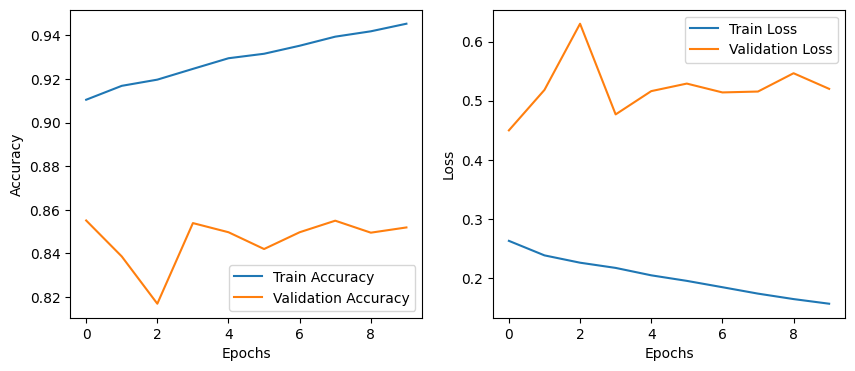

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()